# <font color="red">Predicting Maintenance</font>

Company has a fleet of devices transmitting daily aggregated telemetry attributes.

Predictive maintenance techniques are designed to help determine the condition of
in-service equipment in order to predict when maintenance should be performed.
This approach promises cost savings over routine or time-based preventive
maintenance, because tasks are performed only when warranted.

**Well, our mission in this task, firstly there is a non-labeled data-frame and we have to find which column belongs to which value and secondly this data is imbalanced so we have to fix that problem too.**

# Data Setup

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics

In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('failure.csv')

# EDA - Exploratory Data Analysis

In [5]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

# Observe Data pattern

**My goal for creating that section is I want to see data types and which are they look like**

In [9]:
df.device.nunique() # There is a 1168 unique device

1168

In [10]:
defaultid = df[df.failure ==1].device.unique()

print('Total devices which are failed out of 1168 devices = ', df[df.device.isin(defaultid)].device.nunique())
print('Total devices which are not failed out of 1168 devices = ', df[-df.device.isin(defaultid)].device.nunique())
print('Total devices', df.device.nunique())

Total devices which are failed out of 1168 devices =  106
Total devices which are not failed out of 1168 devices =  1062
Total devices 1168


### Attribute patterns

In [11]:
# Attribute 1

df['attribute1'].unique() # All the values in the column are multiple of '8' so divide all the values with '8' 

array([215630672,  61370680, 173295968, ...,  19029120, 226953408,
        17572840], dtype=int64)

In [12]:
# Attribute 2

df['attribute2'].unique() # All values in the columns are geometric series of 2 

array([   56,     0,  1536,   168,  5160,   392,  1984,   192,   496,
         928,  1952,   128,   744,   136,  7928,   360,     8,   464,
       21528,  1392,   352,  7448,   104,   528,   800,   520,  1888,
        1232,   368,  6336, 17408,  1056,  1160,  2288,  1184,    32,
       64728,   712,  7024,   424, 54896,  1080,  2336,  4960,  5560,
         992,   112,    72,    16,   792, 64776,  4768,   944,   600,
        6328,   160,  1064,  1552,  6264,   440,  4072,  4240,  1960,
         256,   736, 44008,  2000,   376,    24,    40,    80,   344,
        1936,   232, 24656,   728,   240,  1208,  7944,  7800,  1912,
        1248, 56736,   280,  6280,   512,  8392,   504, 21544,  8120,
        6128, 54752,   632,  1072,  6288,  2008,   680,  1944,  1592,
        2016,   752,   144, 21928,  8160,   808,  1152,  1176, 61592,
       47944,   120,  6352,  4248,  1656,  2024,   936,   760, 21944,
        1400,  8688,   816,  6360, 10096, 49768, 64784,   288,  1664,
        2096, 64736,

In [13]:
# Attribute 3

df['attribute3'].unique()

array([    0,     3,     1,   323,   266,     2,    14,     9, 24929,
         382,  1326,     5,   406,  1331,    21,   208,   220,  2693,
          10,    12,   263,    72,   100,     8,   377,    11,     4,
          62,    25,    56,    34,    16,    61,     7,    18,    70,
         318,    15,    36,    53,   279,    24,    35,    38,   107,
        1162,  2112], dtype=int64)

In [14]:
# Attribute 4

df['attribute4'].unique()


array([  52,    0,   41,    1,    9,  175,  521, 1074,   12,   23,    6,
          4,  529,   46,    8,    7,    2,    3,  331,   26,   14,   20,
         15,   13,   17,   27,   37,   10,   69,   76,   24,   73,   25,
          5,   51,   31,   34,   38,   16,   74,  112,   11,   49,   90,
        135,   79,  305,   91,  215,  763,  100, 1033,  186,   39,  235,
        841,  399,   40,  236,   57,  400,   43,  405,   45,  406,   60,
        214,   67,   18,  160,   19,   28,   29,   48,   58,   65,  108,
        204,   50,  118,   35,  122,  128,   36,   21,  147,   97,  256,
         56,  297,   62,  299,  300,  322,  401,   80,   95,   53,   30,
         55,  121,   22, 1666,   86,  173,  288,   32,  431,  486,  487,
        533,   44,   94,  129,  164], dtype=int64)

In [15]:
# Attribute 5

df['attribute5'].unique()

array([ 6, 12, 15,  8, 19, 14,  9,  7,  2, 11,  3,  4,  5, 16, 13, 10, 92,
       70, 62, 58, 63, 65, 90, 67, 91, 95, 32, 39, 36, 17, 60, 24, 25, 18,
       23, 64, 98, 22, 21, 59, 35, 68, 29, 61, 33, 37, 20, 30, 40, 31, 38,
       66, 94, 78, 57, 89,  1, 34, 41, 42], dtype=int64)

In [16]:
# Attribute 6

df['attribute6'].unique() # This columd represents mileage 

array([407438, 403174, 237394, ..., 350410, 358980, 351431], dtype=int64)

In [17]:
# Attribute 7

df['attribute7'].unique()

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

In [18]:
# Attribute 8

df['attribute8'].unique()

array([  0,  16,   8,  48,  32, 312,   6,  24,  40,  56,  96, 112, 136,
       152, 424, 240, 496, 744, 216,  72,  80, 176, 832, 128, 272, 736,
        22, 104], dtype=int64)

In [19]:
# Attribute 9

df['attribute9'].unique()

array([    7,     0,     3,     1,   164,     8,  2269,    21,     5,
           2,   145, 10137,    65,    51,   255,    57,     6,     4,
        1864,   898,     9,    14,    98,  2794,    13,    15,  2637,
          26,    34,    25,   233,    24,  2522,   241,    42,   263,
        1150,  1080,   269,   222,    70,    22,    20,    10,    33,
         400,   120,    41,   248,    12,   205,    18,  1165,    11,
         104,    52,   155,   177,  7226, 18701,  2270,    30,    38,
          19,    23], dtype=int64)

<AxesSubplot:xlabel='failure', ylabel='count'>

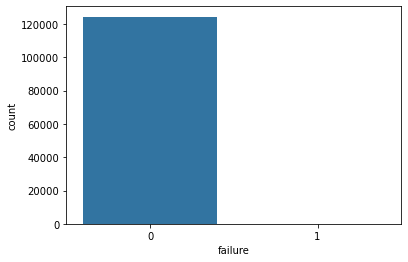

In [20]:
sns.countplot(df['failure'])

# Feature Engineering

In [21]:
prep = df.copy()

#### Correalation between columns

<AxesSubplot:>

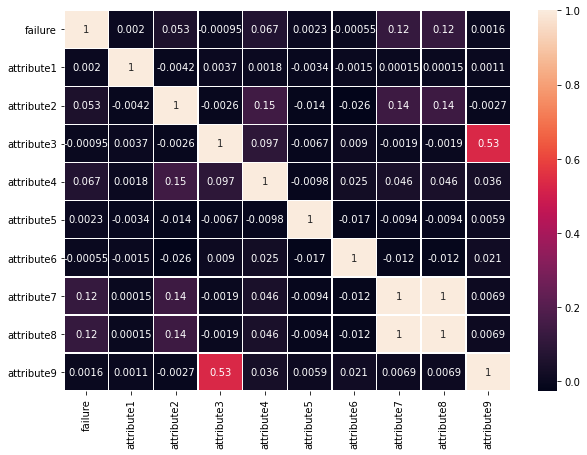

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))
Corr = prep[prep.columns].corr()
sns.heatmap(Corr, annot=True, linewidths=0.5)

## Date

**Converting date column into date object to evalueate how many days device worked and what is the month**

In [23]:
print (prep['date'].dtype)

prep['date'] = pd.to_datetime(prep['date']) 

print (prep['date'].dtype)

prep['year'] = prep['date'].dt.year

prep['month'] = prep['date'].dt.month

prep['day'] = prep['date'].dt.day

object
datetime64[ns]


<AxesSubplot:xlabel='month'>

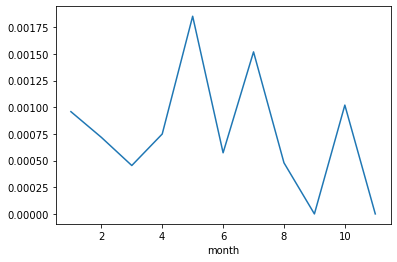

In [24]:
prep.groupby('month')['failure'].mean().plot()

**May, July & October months have peak value for most failure, these could be good feature.**

# Creating a new dataframe to make clean start

In [25]:
new_data = pd.DataFrame()

## Work Days

**Subtract the first day from the last day the device worked, and I extract the just the day part**

In [26]:
new_data['work_days'] = prep.groupby('device')['date'].max() - prep.groupby('device')['date'].min()
new_data['work_days'] = new_data['work_days'].dt.days
new_data['work_days']

device
S1F01085      5
S1F013BB      5
S1F0166B      5
S1F01E6Y     47
S1F01JE0      5
           ... 
Z1F1VMZB    291
Z1F1VQFY    180
Z1F26YZB     83
Z1F282ZV     83
Z1F2PBHX     95
Name: work_days, Length: 1168, dtype: int64

## Total Mileage

**Thanks to groupby because that method saved me to doing for loop**

In [27]:
new_data['total_mileage'] = prep.groupby('device')['attribute6'].max() - prep.groupby('device')['attribute6'].min()
new_data['total_mileage']

device
S1F01085     1966
S1F013BB      209
S1F0166B     1612
S1F01E6Y    22097
S1F01JE0     1965
            ...  
Z1F1VMZB    77016
Z1F1VQFY    41296
Z1F26YZB    20406
Z1F282ZV    21311
Z1F2PBHX    16012
Name: total_mileage, Length: 1168, dtype: int64

# Attribute 1

In [28]:
new_data['att1'] = prep.groupby('device')['attribute1'].max()/8
new_data['att1']

device
S1F01085    26953834.0
S1F013BB    30418260.0
S1F0166B    28042412.0
S1F01E6Y    30032246.0
S1F01JE0    29445357.0
               ...    
Z1F1VMZB    30295174.0
Z1F1VQFY    30383980.0
Z1F26YZB    30242296.0
Z1F282ZV    30396162.0
Z1F2PBHX    30491983.0
Name: att1, Length: 1168, dtype: float64

# Attribute 2

In [29]:
new_data['att2'] = prep.groupby('device')['attribute2'].max()/2

# Attribute 3 (Merging attribute3 and attribute9)

**I merged to new column two columns because they have high correlation between them**

In [30]:
new_data['att39'] = prep.groupby('device')['attribute3'].max()

# Attribute 4

In [31]:
new_data['att4'] = prep.groupby('device')['attribute4'].max()

# Attribute 5

In [32]:
new_data['att5'] = prep.groupby('device')['attribute5'].max()

# Attribute 7 and Attribute 8

In [33]:
prep.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,NaN,0.000321,0.002994
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,NaN,-0.005613,-0.000239
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,NaN,-0.006416,-0.010000
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,NaN,-0.001101,-0.004232
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,NaN,-0.005490,-0.008383
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,NaN,-0.014129,0.009526
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,NaN,0.138159,0.019483
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,NaN,-0.025383,-0.012316


**I merged that dataframes too because their correalation is 1**

In [34]:
new_data['att78'] = prep.groupby('device')['attribute7'].max()

# Failure

In [35]:

new_data['failure']= prep.groupby('device')['failure'].max()
new_data

,work_days,total_mileage,att1,att2,att39,att4,att5,att78,failure
device,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0


# Month

**I created this column because I wonder that is seasonality affecting to device failure ?**

In [36]:
new_data['month'] = prep.groupby('device')['month'].max()
new_data

,work_days,total_mileage,att1,att2,att39,att4,att5,att78,failure,month
device,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0,1
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0,1
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0,3


# Device Type

**There are 3 types of data which are started with S1F Z1F W1F**

In [37]:
liste = list()

for i in prep.groupby('device')['device']:
    liste.append(i[0][0:3])
    
new_data['device_type'] = liste
new_data

,work_days,total_mileage,att1,att2,att39,att4,att5,att78,failure,month,device_type
device,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0,1,S1F
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,S1F
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0,1,S1F
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,S1F
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,S1F
...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,Z1F
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,Z1F
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0,3,Z1F


In [38]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_days      1168 non-null   int64  
 1   total_mileage  1168 non-null   int64  
 2   att1           1168 non-null   float64
 3   att2           1168 non-null   float64
 4   att39          1168 non-null   int64  
 5   att4           1168 non-null   int64  
 6   att5           1168 non-null   int64  
 7   att78          1168 non-null   int64  
 8   failure        1168 non-null   int64  
 9   month          1168 non-null   int64  
 10  device_type    1168 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 149.5+ KB


## Segregated continues & categorical variable

In [41]:

new_data['att4']=new_data['att4'].astype('category')
new_data['att5']=new_data['att5'].astype('category')
new_data['device_type']=new_data['device_type'].astype('category')
new_data['att39']=new_data['att39'].astype('category')
new_data['att78']=new_data['att78'].astype('category')
new_data['att2']=new_data['att2'].astype('category')
new_data['month']=new_data['month'].astype('category')

In [42]:
new_data

,work_days,total_mileage,att1,att2,att39,att4,att5,att78,failure,month,device_type
device,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,0,52,6,0,0,1,S1F
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,S1F
S1F0166B,5,1612,28042412.0,0.0,3,0,6,0,0,1,S1F
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,S1F
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,S1F
...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,Z1F
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,Z1F
Z1F26YZB,83,20406,30242296.0,0.0,1,0,1,0,0,3,Z1F


## Scaling continuous variable

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   work_days      1168 non-null   int64   
 1   total_mileage  1168 non-null   int64   
 2   att1           1168 non-null   float64 
 3   att2           1168 non-null   category
 4   att39          1168 non-null   category
 5   att4           1168 non-null   category
 6   att5           1168 non-null   category
 7   att78          1168 non-null   category
 8   failure        1168 non-null   int64   
 9   month          1168 non-null   category
 10  device_type    1168 non-null   category
dtypes: category(7), float64(1), int64(3)
memory usage: 108.4+ KB


In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
new_data[['att1', 'total_mileage', 'work_days']] = scaler.fit_transform(new_data[['att1', 'total_mileage', 'work_days']])

In [47]:
new_data.head()

,work_days,total_mileage,att1,att2,att39,att4,att5,att78,failure,month,device_type
device,,,,,,,,,,,
S1F01085,-1.025220,-0.804348,-0.442297,28.0,0,52,6,0,0,1,S1F
S1F013BB,-1.025220,-0.852462,0.505001,0.0,0,0,5,0,0,5,S1F
S1F0166B,-1.025220,-0.814042,-0.144641,0.0,3,0,6,0,0,1,S1F
S1F01E6Y,-0.621165,-0.253074,0.399451,0.0,0,0,12,0,0,2,S1F
S1F01JE0,-1.025220,-0.804375,0.238975,0.0,0,0,6,0,0,1,S1F


# Modelling

In [48]:
X = new_data[['work_days', 'total_mileage', 'att1', 'att2', 'att39', 'att4', 'att5', 'att78', 'month', 'device_type']]

In [49]:
y = new_data[['failure']]

In [50]:
y

,failure
device,
S1F01085,0
S1F013BB,0
S1F0166B,0
S1F01E6Y,0
S1F01JE0,0
...,...
Z1F1VMZB,0
Z1F1VQFY,1
Z1F26YZB,0


In [51]:
X = pd.get_dummies(X, drop_first=True)

In [52]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2) 

### Oversampling

In [53]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train_res.shape, y_train_res.shape

((1712, 320), (1712, 1))

In [54]:
y_train_res[y_train_res['failure']==1], y_train_res[y_train_res['failure']==0]

(      failure
 1           1
 3           1
 4           1
 49          1
 56          1
 ...       ...
 1707        1
 1708        1
 1709        1
 1710        1
 1711        1
 
 [856 rows x 1 columns],
      failure
 0          0
 2          0
 5          0
 6          0
 7          0
 ..       ...
 928        0
 929        0
 931        0
 932        0
 933        0
 
 [856 rows x 1 columns])

In [55]:
X_train_res

,work_days,total_mileage,att1,att2_4.0,att2_8.0,att2_12.0,att2_16.0,att2_28.0,att2_36.0,att2_44.0,att2_48.0,att2_52.0,att2_56.0,att2_60.0,att2_68.0,att2_72.0,att2_80.0,att2_84.0,att2_88.0,att2_96.0,att2_100.0,att2_104.0,att2_116.0,att2_120.0,att2_148.0,att2_152.0,att2_172.0,att2_180.0,att2_188.0,att2_196.0,att2_220.0,att2_228.0,att2_232.0,att2_252.0,att2_256.0,att2_260.0,att2_264.0,att2_276.0,att2_308.0,att2_316.0,att2_324.0,att2_356.0,att2_368.0,att2_380.0,att2_396.0,att2_408.0,att2_460.0,att2_468.0,att2_480.0,att2_488.0,...,att5_62,att5_63,att5_64,att5_65,att5_66,att5_67,att5_68,att5_70,att5_78,att5_89,att5_90,att5_91,att5_92,att5_94,att5_95,att5_98,att78_6,att78_8,att78_16,att78_22,att78_24,att78_32,att78_40,att78_48,att78_56,att78_72,att78_96,att78_104,att78_112,att78_128,att78_152,att78_176,att78_216,att78_312,att78_424,att78_736,att78_744,att78_832,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_type_W1F,device_type_Z1F
0,-0.149766,1.448258,0.488649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.244669,-0.265589,0.440252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,-0.294072,-0.002070,0.382897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.542900,1.042395,0.519948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.138845,-0.857993,0.530864,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,0.751813,0.011404,0.519993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1708,-0.906353,-0.357714,-0.059810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1709,0.197651,-0.096928,0.495585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1710,0.146533,-0.117390,0.525906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r= RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d= DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()
b = BernoulliNB()


In [57]:
algorithms = [g,b,k,log,gbc,r,d]
names = ['GaussianNB','BernoulliNB', 'K Nearest', 'Logistic','GradientBoosting','RandomForest','DecisionTree',]

In [58]:
algorithms = [g,b,k,log,gbc,r,d]
names = ['GaussianNB','BernoulliNB', 'K Nearest', 'Logistic','GradientBoosting','RandomForest','DecisionTree',]
def algo_test(A, b, algorithms = algorithms,names = names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(A, b)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(X)))
        precision.append(precision_score(y, algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y, algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending = False)

In [59]:
algo_test(X_train_res, y_train_res)

,Accuracy,Precision,Recall,F1
GradientBoosting,0.988014,0.942308,0.924528,0.933333
DecisionTree,0.983733,0.939394,0.877358,0.907317
RandomForest,0.983733,0.967742,0.849057,0.904523
Logistic,0.912671,0.514925,0.650943,0.575000
BernoulliNB,0.900685,0.467532,0.679245,0.553846
K Nearest,0.881849,0.418367,0.773585,0.543046
GaussianNB,0.375856,0.119658,0.924528,0.211892


In [60]:
predicting = d.predict(X_test)
predicting

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [61]:
y_test

,failure
device,
S1F135F0,0
W1F0ZVD8,0
W1F1FZ8B,0
Z1F0LBBG,0
W1F0X5VA,0
...,...
S1F0RSML,0
Z1F0LSQ2,0
S1F0QX4C,0


# Deep Learning

In [62]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model=Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# sigmoid activation method gives us the result just 0 or 1 

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#We are using binary_crossentropy because we are doing classification
#2den fazla seçenek varsa categorical_crossentropy
#optimizer en az masrafla
#accuracy, precision, recall, f1score bunlar classificationda hata payımızı bulma

In [65]:
history = model.fit(X,y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
117/117 [==============================] - 1s 1ms/step - loss: 0.6346 - accuracy: 0.9063
Epoch 2/150
117/117 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.9152
Epoch 3/150
117/117 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.9091
Epoch 4/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.9066
Epoch 5/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.9040
Epoch 6/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.9131
Epoch 7/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9005
Epoch 8/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9338
Epoch 9/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9750
Epoch 10/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1084 - accura

117/117 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9947
Epoch 82/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9908
Epoch 83/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0165 - accuracy: 0.9961
Epoch 84/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9940
Epoch 85/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9939
Epoch 86/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9948
Epoch 87/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9939
Epoch 88/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0186 - accuracy: 0.9960
Epoch 89/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9932
Epoch 90/150
117/117 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 

In [66]:
scores=model.evaluate(X,y)

37/37 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9949


In [67]:
print("%s:%.2r%%" % (model.metrics_names[1],scores[1]*100))

accuracy:99%


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

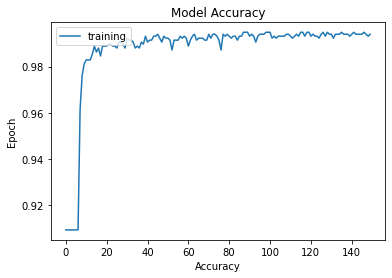

In [69]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")
